# #004_DL_1

## Tensorflow 2.0 beta

### 이미지 데이터 분류하기 

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

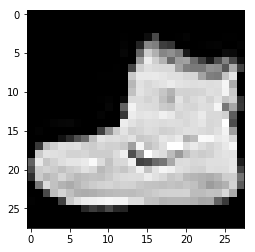

In [14]:
plt.imshow(X_train[0], cmap='gray')

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0 #데이터 학습을 위해 0과 1 사이의 값으로 normalize 했다.

 - activation이 없는 경우 : 리그레이션, dropout, inputlayer, 

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #== .reshape을 이용하기
    tf.keras.layers.Dense(512, activation=tf.nn.relu), #== 'relu'
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [18]:
model.fit(X_train, y_train, epochs=5)

W0626 14:22:35.639631 4517230016 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4733 - acc: 0.8306
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3585 - acc: 0.8674
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3210 - acc: 0.8812
Epoch 4/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2974 - acc: 0.8894
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2800 - acc: 0.8960


In [19]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3530 - acc: 0.8707


[0.3529632986545563, 0.8707]

In [23]:
predictions = model.predict(X_test)
predictions[0] #softmax기 때문에 10개의 확률이 나오고 그 중 가장 높은 index가 예측값이다.

array([2.8920178e-07, 1.1352495e-08, 9.9980770e-09, 4.8665039e-10,
       1.4928380e-08, 2.8459015e-04, 1.6056916e-07, 1.4004960e-02,
       1.0049191e-06, 9.8570895e-01], dtype=float32)

---

 - 학습한 모델에 맞춰서 예측값도 들어가야한다. 따라서 test 데이터도 형태를 변경해줘야한다.

In [24]:
import numpy as np

In [28]:
X_test[0].shape

(28, 28)

In [29]:
X_test[0][np.newaxis].shape

(1, 28, 28)

In [30]:
np.expand_dims(X_test[0],0).shape 

(1, 28, 28)

---

### 텍스트 데이터 분류하기

 - tensorflow hub : 다른 용도로 만들어진 모델을 가지고와서 적은 비용으로 모델을 만들기 위해 제공되는 기능
 - tensorflow datasets : 

In [45]:
!pip install -q tensorflow-hub #설치할때는 -, 사용할때는 _

In [47]:
!pip install -q tensorflow-datasets 

In [48]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [49]:
print('version : ', tf.__version__)
print('early start mode : ',tf.executing_eagerly())
print('hub version : ',hub.__version__)
print('GPU','Able' if tf.test.is_gpu_available() else 'Disable')

version :  2.0.0-beta1
early start mode :  True
hub version :  0.5.0
GPU Disable


In [50]:
dir(tfds)

['GenerateMode',
 'Split',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'as_numpy',
 'audio',
 'builder',
 'core',
 'disable_progress_bar',
 'division',
 'download',
 'features',
 'file_adapter',
 'image',
 'is_dataset_on_gcs',
 'list_builders',
 'load',
 'percent',
 'print_function',
 'public_api',
 'structured',
 'testing',
 'text',
 'tf_compat',
 'translate',
 'units',
 'version',
 'video']

In [51]:
dir(tfds.Split)

['ALL',
 'TEST',
 'TRAIN',
 'VALIDATION',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [52]:
dir(tfds.Split.TRAIN)

['__abstractmethods__',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_name',
 'get_read_instruction',
 'subsplit']

In [53]:
train_validation_split = tfds.Split.TRAIN.subsplit([6,4]) #훈련세트를 6대4로 나눈다.

#holdout기법(train 데이터를 한번 더 쪼갠다.)
(train_data, validation_data), test_data = tfds.load(
    name='imdb_reviews',
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True #내부적으로 X,Y를 쪼개준다.
)

W0626 14:57:36.215512 4517230016 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow_datasets/core/file_format_adapter.py:247: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /Users/pd/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [59]:
train_data

<_OptionsDataset shapes: ((), ()), types: (tf.string, tf.int64)>